# Boston Housing ~ Price Predictions

In [268]:
# This is for dataframe manipulation.
import pandas

# This is for special high-efficiency arrays.
import numpy

# This is the boston housing dataset.
from sklearn.datasets import load_boston

# This is for plotting data-points.
import matplotlib.pyplot as pyplot

# These various imports will be explained as they are used later.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Activation

## Import & Read Boston Data

In [269]:
# Load the boston housing dataset.
boston = load_boston()

# Print data description.
print(boston.DESCR[21:])

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by 

In [270]:
# Create the dataframe.
data = pandas.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

In [271]:
# This outputs the first five columns of the dataframe.
display(data.head(5))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [272]:
# This describes properties of each dataframe column.
display(data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Prepare Data
There are so many variables within the boston housing dataset.
Some of them are less relevant than others.
Reading over the data, there is only a few variables that seem to more directly affect price&hellip;
- ~~**CRIM:** per capita crime rate by town~~
- ~~**ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.~~
- ~~**INDUS:** proportion of non-retail business acres per town~~
- ~~**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)~~
- ~~**NOX:** nitric oxides concentration (parts per 10 million)~~
- **RM:** average number of rooms per dwelling
- ~~**AGE:** proportion of owner-occupied units built prior to 1940~~
- ~~**DIS:** weighted distances to five Boston employment centres~~
- **RAD:** index of accessibility to radial highways
- ~~**TAX:** full-value property-tax rate per &dollar;10,000~~
- **PTRATIO:** pupil-teacher ratio by town
- ~~**B:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town~~
- **LSTAT:** % lower status of the population

Once we remove those less-relevent variables, we are left with:
- **RM:** average number of rooms per dwelling
- **RAD:** index of accessibility to radial highways
- **PTRATIO:** pupil-teacher ratio by town
- **LSTAT:** % lower status of the population

In [273]:
# Consider only [RM, RAD, PTRATIO, LSTAT]
items = ['PTRATIO', 'RM']

# Create an array of those data-items; X.
X = []
for x in items:
	X.append(data[x])
# The python splat-operator (*X) removes the array.
# This makes its items into parameters for the zip function.
X = numpy.array(list(zip(*X)))

# Do the same for the target data; Y.
Y = data['PRICE']

display(X.shape)
display(Y.shape)

(506, 2)

(506,)

### Train/Test Split
*Why do we need train/test split?*
*What does it do?*

In [274]:
# Use the built-in "train test split" function
# to generate the four desireable segments of data.
X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size=0.35, random_state=0)

display(X_train.shape)
display(X_test.shape)

(328, 2)

(178, 2)

### Min/Max Scalar
*Why do we need min/max scalar?*
*What does it do?*

In [275]:
# First, scale X.
X_scaled = MinMaxScaler()
# No reshaping necessary for X.
# Reshaping is needed for Y, though.
X_scaled.fit(X_train)
X_scaled.transform(X_test)

array([[0.45744681, 0.53113623],
       [0.80851064, 0.50871815],
       [0.40425532, 0.53880054],
       [0.80851064, 0.34259437],
       [0.64893617, 0.51178387],
       [0.89361702, 0.43552405],
       [0.80851064, 0.44912819],
       [0.80851064, 0.46119946],
       [0.61702128, 0.27054991],
       [0.88297872, 0.54493198],
       [0.80851064, 0.45909178],
       [0.80851064, 0.59321709],
       [0.80851064, 0.53266909],
       [0.80851064, 0.20904388],
       [0.22340426, 0.81260778],
       [0.23404255, 0.66679441],
       [0.80851064, 0.51369994],
       [0.        , 0.71392987],
       [0.42553191, 0.57194865],
       [0.70212766, 0.43858977],
       [0.74468085, 0.54895574],
       [0.22340426, 0.444338  ],
       [0.88297872, 0.49166507],
       [0.53191489, 0.55968576],
       [0.56382979, 0.40639969],
       [0.80851064, 0.05786549],
       [0.89361702, 0.46062464],
       [0.22340426, 0.4115731 ],
       [0.57446809, 0.86376701],
       [0.55319149, 0.4849588 ],
       [0.

In [276]:
# Next, scale Y.
Y_scaled =  MinMaxScaler()
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)
Y_scaled.fit(Y_train)
Y_scaled.transform(Y_test)

# ==TODO==
# Explain why numpy.values.reshape(-1,1) is valuable.

array([[0.39111111],
       [1.        ],
       [0.4       ],
       [0.07333333],
       [0.36      ],
       [0.33111111],
       [0.34666667],
       [0.30444444],
       [0.24666667],
       [0.30222222],
       [0.08444444],
       [0.27111111],
       [0.22      ],
       [0.12222222],
       [1.        ],
       [0.53333333],
       [0.4       ],
       [0.62888889],
       [0.54222222],
       [0.35555556],
       [0.41777778],
       [0.31333333],
       [0.34222222],
       [0.53555556],
       [0.31777778],
       [0.40222222],
       [0.32444444],
       [0.32      ],
       [0.74888889],
       [0.30444444],
       [0.21333333],
       [0.33333333],
       [0.34444444],
       [0.33555556],
       [0.41333333],
       [0.26222222],
       [0.01333333],
       [1.        ],
       [0.21111111],
       [0.18444444],
       [0.42      ],
       [0.33333333],
       [0.32888889],
       [0.19555556],
       [0.25555556],
       [0.36888889],
       [0.34      ],
       [0.266

## Build the Model

In [277]:
# ==TODO==
# Many questions with keras model-building.

# What does Sequential do?
model = Sequential()

# What does Dense do?
model.add(Dense(15, input_dim=2, kernel_initializer='normal'))

# Activation??
model.add(Activation('linear'))
model.add(Dense(1, activation='linear'))

# What about compile????
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')

In [278]:
model.fit(
	X_train,
	Y_train,
	epochs=150, batch_size=50,
	verbose=1, validation_split=0.2
)

Train on 262 samples, validate on 66 samples
Epoch 1/150
262/262 [==============================] - 0s 1ms/step - loss: 658.3539 - mean_squared_error: 658.3539 - val_loss: 594.8220 - val_mean_squared_error: 594.8220
Epoch 2/150
262/262 [==============================] - 0s 55us/step - loss: 626.3225 - mean_squared_error: 626.3225 - val_loss: 564.6974 - val_mean_squared_error: 564.6974
Epoch 3/150
262/262 [==============================] - 0s 65us/step - loss: 595.0969 - mean_squared_error: 595.0969 - val_loss: 535.6027 - val_mean_squared_error: 535.6027
Epoch 4/150
262/262 [==============================] - 0s 73us/step - loss: 565.3398 - mean_squared_error: 565.3398 - val_loss: 507.1828 - val_mean_squared_error: 507.1828
Epoch 5/150
262/262 [==============================] - 0s 73us/step - loss: 535.4532 - mean_squared_error: 535.4532 - val_loss: 479.3406 - val_mean_squared_error: 479.3406
Epoch 6/150
262/262 [==============================] - 0s 69us/step - loss: 506.2970 - mean_squa

262/262 [==============================] - 0s 55us/step - loss: 101.5021 - mean_squared_error: 101.5021 - val_loss: 95.7510 - val_mean_squared_error: 95.7510
Epoch 49/150
262/262 [==============================] - 0s 71us/step - loss: 101.3863 - mean_squared_error: 101.3863 - val_loss: 95.6877 - val_mean_squared_error: 95.6877
Epoch 50/150
262/262 [==============================] - 0s 70us/step - loss: 101.2335 - mean_squared_error: 101.2335 - val_loss: 95.5197 - val_mean_squared_error: 95.5197
Epoch 51/150
262/262 [==============================] - 0s 82us/step - loss: 101.1060 - mean_squared_error: 101.1060 - val_loss: 95.3684 - val_mean_squared_error: 95.3684
Epoch 52/150
262/262 [==============================] - 0s 82us/step - loss: 100.9772 - mean_squared_error: 100.9772 - val_loss: 95.2911 - val_mean_squared_error: 95.2911
Epoch 53/150
262/262 [==============================] - 0s 67us/step - loss: 100.8383 - mean_squared_error: 100.8383 - val_loss: 95.1970 - val_mean_squared_er

262/262 [==============================] - 0s 54us/step - loss: 93.7493 - mean_squared_error: 93.7493 - val_loss: 88.7779 - val_mean_squared_error: 88.7779
Epoch 97/150
262/262 [==============================] - 0s 57us/step - loss: 93.5612 - mean_squared_error: 93.5612 - val_loss: 88.5015 - val_mean_squared_error: 88.5015
Epoch 98/150
262/262 [==============================] - 0s 59us/step - loss: 93.3588 - mean_squared_error: 93.3588 - val_loss: 88.2700 - val_mean_squared_error: 88.2700
Epoch 99/150
262/262 [==============================] - 0s 52us/step - loss: 93.1422 - mean_squared_error: 93.1422 - val_loss: 88.0629 - val_mean_squared_error: 88.0629
Epoch 100/150
262/262 [==============================] - 0s 62us/step - loss: 92.9525 - mean_squared_error: 92.9525 - val_loss: 87.9182 - val_mean_squared_error: 87.9182
Epoch 101/150
262/262 [==============================] - 0s 64us/step - loss: 92.7433 - mean_squared_error: 92.7433 - val_loss: 87.7285 - val_mean_squared_error: 87.72

262/262 [==============================] - 0s 58us/step - loss: 82.5085 - mean_squared_error: 82.5085 - val_loss: 78.1846 - val_mean_squared_error: 78.1846
Epoch 145/150
262/262 [==============================] - 0s 60us/step - loss: 82.2387 - mean_squared_error: 82.2387 - val_loss: 78.0279 - val_mean_squared_error: 78.0279
Epoch 146/150
262/262 [==============================] - 0s 61us/step - loss: 81.9319 - mean_squared_error: 81.9319 - val_loss: 77.8384 - val_mean_squared_error: 77.8384
Epoch 147/150
262/262 [==============================] - 0s 58us/step - loss: 81.6783 - mean_squared_error: 81.6783 - val_loss: 77.6668 - val_mean_squared_error: 77.6668
Epoch 148/150
262/262 [==============================] - 0s 59us/step - loss: 81.4171 - mean_squared_error: 81.4171 - val_loss: 77.5420 - val_mean_squared_error: 77.5420
Epoch 149/150
262/262 [==============================] - 0s 56us/step - loss: 81.1505 - mean_squared_error: 81.1505 - val_loss: 77.2520 - val_mean_squared_error: 77

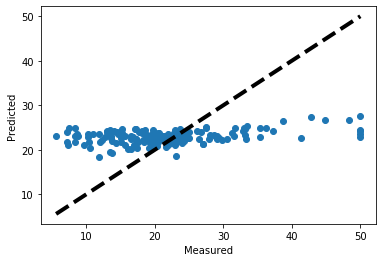

In [279]:
Y_predict = model.predict(X_test)
figure, axis = pyplot.subplots()

axis.scatter(Y_test, Y_predict)
axis.plot(
	[Y_test.min(), Y_test.max()],
	[Y_test.min(), Y_test.max()],
	'k--', lw=4
)
axis.set_xlabel('Measured')
axis.set_ylabel('Predicted')

pyplot.show()